# OSSM Live Tracker

Real-time position tracking from a live camera feed.

## Instructions

1. **Select camera** - Start preview, press Enter or Next when ready
2. **Calibrate** - Click to place 2 calibration points, drag to adjust, press Done
3. **Select AprilTags** - Detected tagStandard41h12 tags will appear automatically. Select which tag IDs to track.
4. **Record** - Press Record to start capturing position data
5. **Save** - Data auto-saves when recording stops

### AprilTags

This tracker uses [AprilTag](https://github.com/AprilRobotics/apriltag) fiducial markers (tagStandard41h12 family). 
Print tags from the [apriltag-imgs](https://github.com/AprilRobotics/apriltag-imgs/tree/master/tagStandard41h12) repository.

In [ ]:
from live_tracker import LiveTracker

tracker = LiveTracker()
tracker.show()

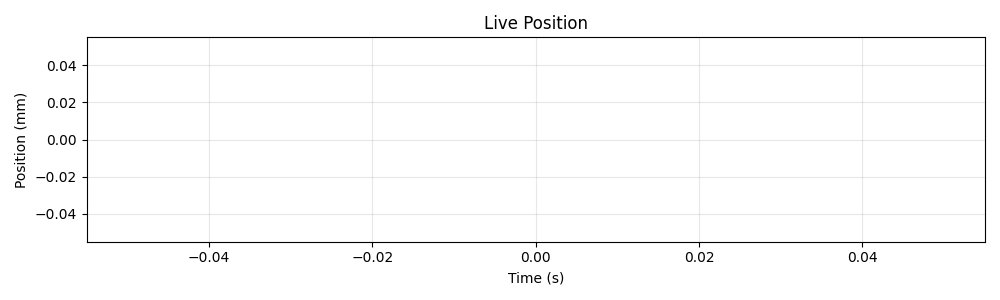

: 

In [ ]:
# Optional: Live chart (run after collecting some data)
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 3))
line, = ax.plot([], [], 'b-', linewidth=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (mm)')
ax.set_title('Live Position')
ax.grid(True, alpha=0.3)

def update(frame):
    if tracker.positions:
        recent = tracker.positions[-1000:]
        line.set_data([p['time_s'] for p in recent], [p['position_mm'] for p in recent])
        ax.relim()
        ax.autoscale_view()
    return line,

ani = FuncAnimation(fig, update, interval=100, blit=True, cache_frame_data=False)
plt.tight_layout()
plt.show()